In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv('1_DA - Test - Company List 3.csv')

### Cleaning the Data

In [104]:
# Cleaning Funded Amount: Removing special characters and converting to numeric
df["Funded Amount"] = df["Funded Amount"].replace({r"[^0-9.]": ""}, regex=True)
df["Funded Amount"] = pd.to_numeric(df["Funded Amount"], errors='coerce')

# Standardizing Funded Date: Converting to datetime format
df["Funded Date"] = pd.to_datetime(df["Funded Date"], errors='coerce')

# Extracting numeric values from "No.of Emp" and "No.of Decision Makers"
df["No.of Emp"] = pd.to_numeric(df["No.of Emp"], errors='coerce')
df["No.of Decision Makers"] = pd.to_numeric(df["No.of Decision Makers"], errors='coerce')

# Checking the cleaned data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17773 entries, 0 to 17772
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Company Name           17768 non-null  object        
 1   Funded Date            5552 non-null   datetime64[ns]
 2   Funded Amount          6964 non-null   float64       
 3   Fund Type              14485 non-null  object        
 4   Company Linkedin Url   15478 non-null  object        
 5   Website                12030 non-null  object        
 6   No.of Emp              44 non-null     float64       
 7   Industries             8792 non-null   object        
 8   No.of Decision Makers  3145 non-null   float64       
 9   Priority               1782 non-null   object        
 10  Founded Year           1758 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.5+ MB


(None,
          Company Name Funded Date  Funded Amount                 Fund Type  \
 0             Pure EV  2024-02-19    660000000.0                  Series A   
 1               Haber  2024-12-11      6000000.0            Debt Financing   
 2    Scrut Automation  2024-04-02     10000000.0            Private Equity   
 3  Orange Health Labs  2024-12-06     12000000.0  Venture - Series Unknown   
 4              Bhanzu  2024-11-11     16500000.0                  Series B   
 
                                 Company Linkedin Url             Website   \
 0       https://www.linkedin.com/company/pureevindia        www.pureev.in   
 1  https://www.linkedin.com/company/haber-technol...   www.haberwater.com   
 2  https://www.linkedin.com/company/scrut-automation         www.scrut.io   
 3     https://www.linkedin.com/company/orange-health  www.orangehealth.in   
 4            https://www.linkedin.com/company/bhanzu           bhanzu.com   
 
    No.of Emp Industries  No.of Decision Makers

### Handling the Data

In [107]:
# Handling missing values
df_cleaned = df.copy()

# Dropping columns with excessive missing data (more than 80% missing)
columns_to_drop = ["No.of Emp", "No.of Decision Makers", "Priority"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Filling missing values in categorical columns with 'Unknown'
categorical_columns = ["Fund Type", "Industries"]
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna("Unknown")

# Filling missing numerical values with median (for Funded Amount)
df_cleaned["Funded Amount"] = df_cleaned["Funded Amount"].fillna(df_cleaned["Funded Amount"].median())

# Checking missing values after cleaning
df_cleaned.isnull().sum()


Company Name                5
Funded Date             12221
Funded Amount               0
Fund Type                   0
Company Linkedin Url     2295
Website                  5743
Industries                  0
Founded Year            16015
dtype: int64

In [108]:
# Save the cleaned data
df_cleaned.to_csv("company list 3.csv", index=False)

### Data Visualization

In [8]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

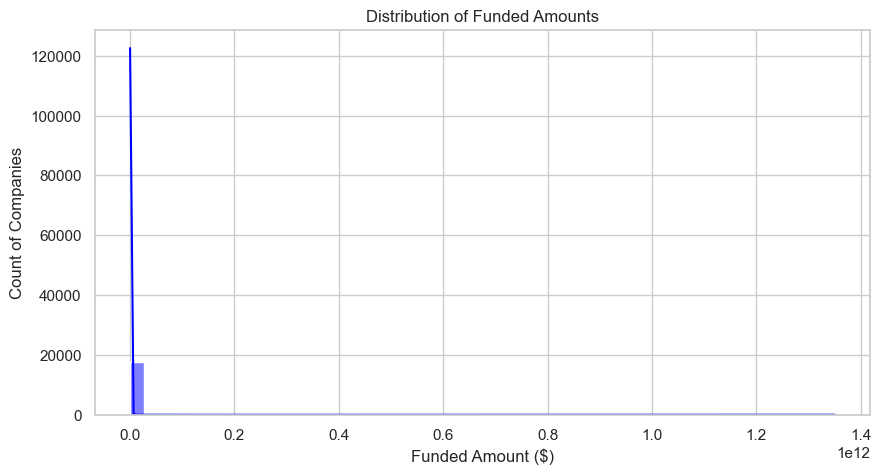

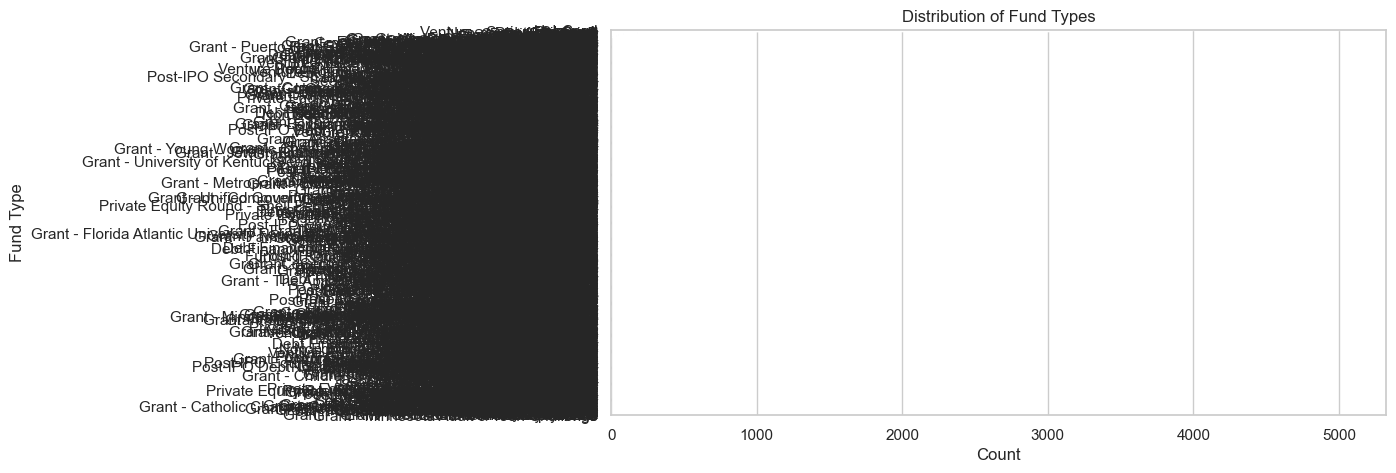

In [9]:
# Set style for plots
sns.set(style="whitegrid")

# Plot: Distribution of Funded Amount
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Funded Amount"], bins=50, kde=True, color="blue")
plt.xlabel("Funded Amount ($)")
plt.ylabel("Count of Companies")
plt.title("Distribution of Funded Amounts")
plt.show()

# Plot: Count of Funding Types
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned["Fund Type"], order=df_cleaned["Fund Type"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Fund Type")
plt.title("Distribution of Fund Types")
plt.show()


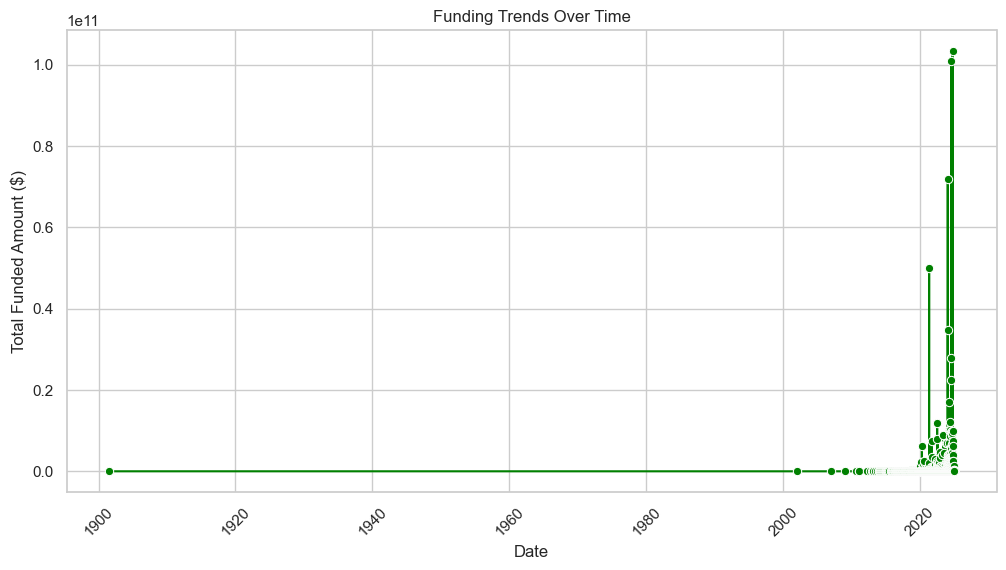

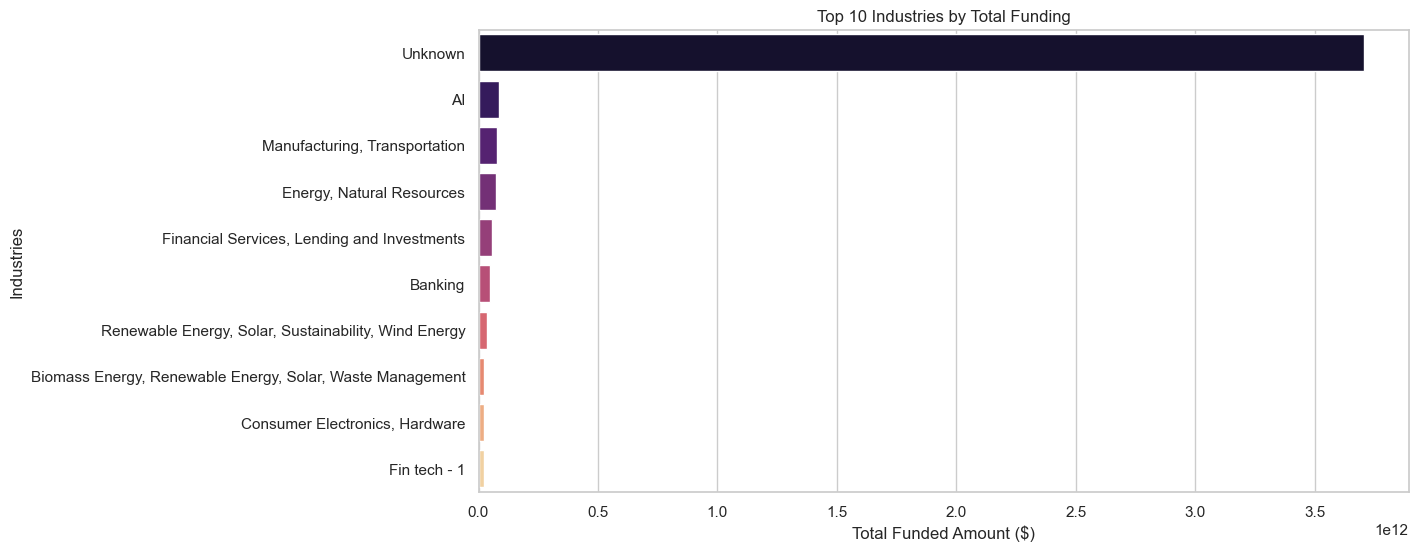

In [10]:
# Aggregating funding amount over time
df_time_trend = df_cleaned.groupby("Funded Date")["Funded Amount"].sum().dropna()

# Plot: Funding Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_trend.index, y=df_time_trend.values, marker="o", color="green")
plt.xlabel("Date")
plt.ylabel("Total Funded Amount ($)")
plt.title("Funding Trends Over Time")
plt.xticks(rotation=45)
plt.show()

# Aggregating funding amount by industry
df_industry_funding = df_cleaned.groupby("Industries")["Funded Amount"].sum().sort_values(ascending=False).head(10)

# Plot: Industry-wise funding
plt.figure(figsize=(12, 6))
sns.barplot(x=df_industry_funding.values, y=df_industry_funding.index, palette="magma")
plt.xlabel("Total Funded Amount ($)")
plt.ylabel("Industries")
plt.title("Top 10 Industries by Total Funding")
plt.show()


# _2_DA - Test - Company Inputs 2

In [12]:
# Load dataset
df = pd.read_csv('2_DA - Test - Company Inputs 2.csv')

## Data PipeLine steps upto Data Visualizastion

###  Step 1: Data Cleaning

In [15]:
# Convert columns to appropriate types
df["Founded Year"] = pd.to_numeric(df["Founded Year"], errors='coerce')
df["Annual Revenue"] = pd.to_numeric(df["Annual Revenue"], errors='coerce')
df["# Employees"] = pd.to_numeric(df["# Employees"], errors='coerce')

# Handle missing values
df.dropna(subset=["Industry", "Founded Year"], inplace=True)
df.fillna({"Annual Revenue": df["Annual Revenue"].median()}, inplace=True)


### Step 2: Data Handling

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Filter out extreme values in Annual Revenue
df = df[df["Annual Revenue"] < 1e9]

### Step 3: Modeling

In [19]:
# Example: Group by Industry to analyze average revenue per industry
industry_revenue = df.groupby("Industry")["Annual Revenue"].mean().sort_values(ascending=False)

In [20]:
df.head()

,Founded Year,Company,# Employees,Website,Industry,Keywords,SEO Description,Latest Funding type,Latest Funding Amount,Last Raised At,Annual Revenue
0,1528.0,Birbal Learning Private Limited,19.0,http://www.birbal.org.in,information technology & services,"elearning, online courses, massive open online...",NaN,NaN,NaN,NaN,3200000.0
1,1771.0,Thewastore.com,2.0,http://www.thewastore.com,arts & crafts,NaN,NaN,NaN,NaN,NaN,3200000.0
2,1850.0,Northfield Township of Illinois,11.0,http://www.northfieldtownship.com,government administration,"social services, assessor, food pantry, voter ...","Northfield Township, located within northern C...",NaN,NaN,NaN,3200000.0
4,1865.0,epilot,59.0,http://www.pilotonline.com,media production,NaN,NaN,NaN,NaN,NaN,10000000.0
5,1876.0,Rockdale Independent School District,27.0,http://www.rockdaleisd.net,primary/secondary education,NaN,Home - Rockdale Independent School District,NaN,NaN,NaN,44513000.0


### Step 4: Visualization

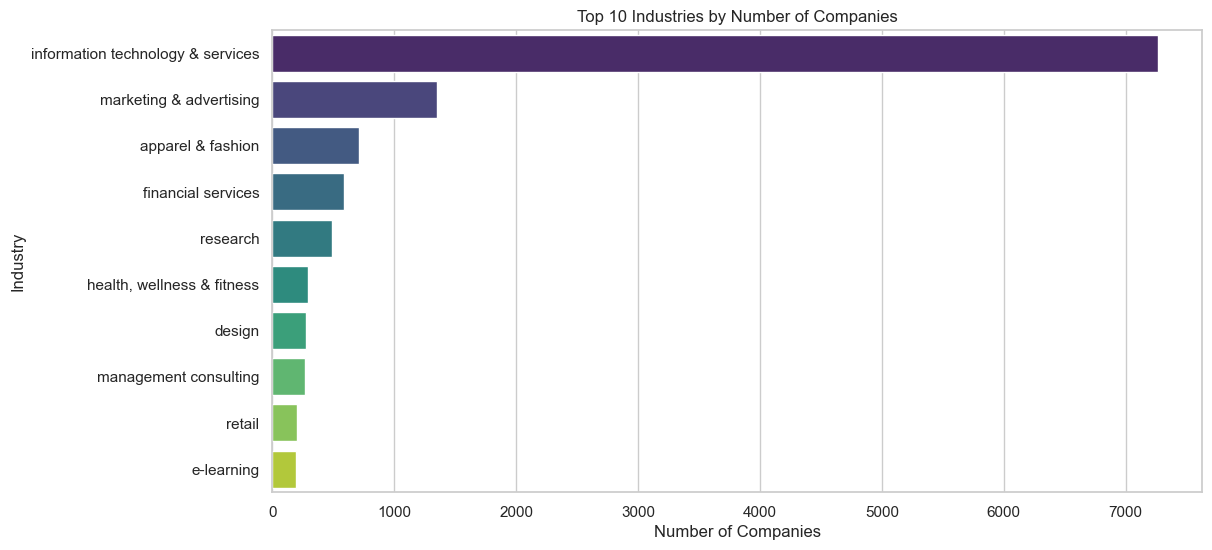

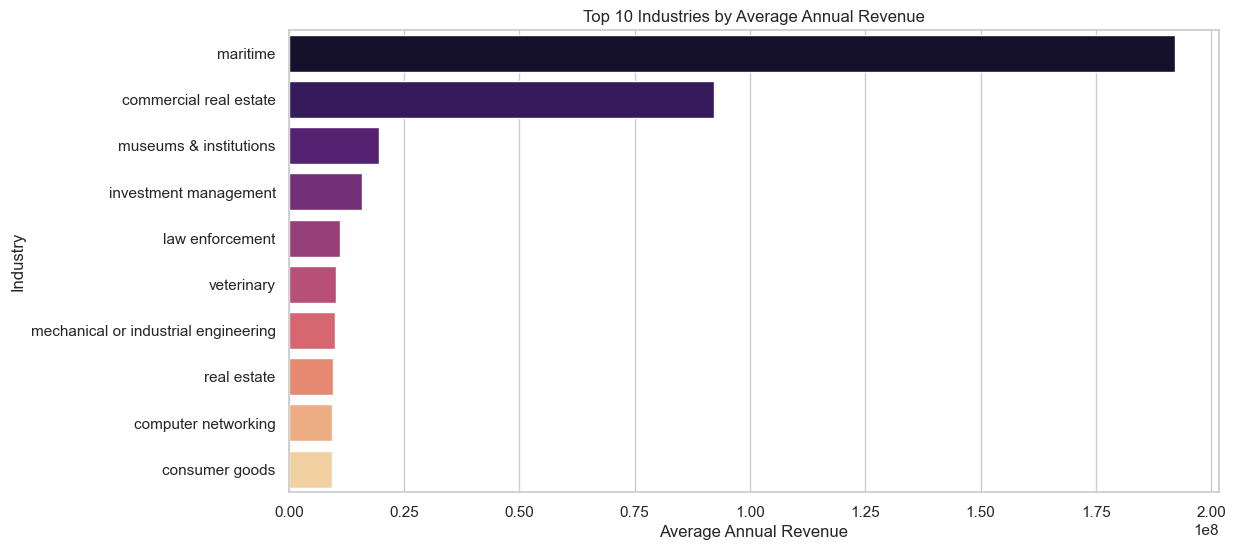

In [22]:
# Industry Distribution
plt.figure(figsize=(12, 6))
industry_counts = df["Industry"].value_counts().head(10)  # Top 10 industries
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")
plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Number of Companies")
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(y=industry_revenue.head(10).index, x=industry_revenue.head(10).values, palette="magma")
plt.xlabel("Average Annual Revenue")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Average Annual Revenue")
plt.show()

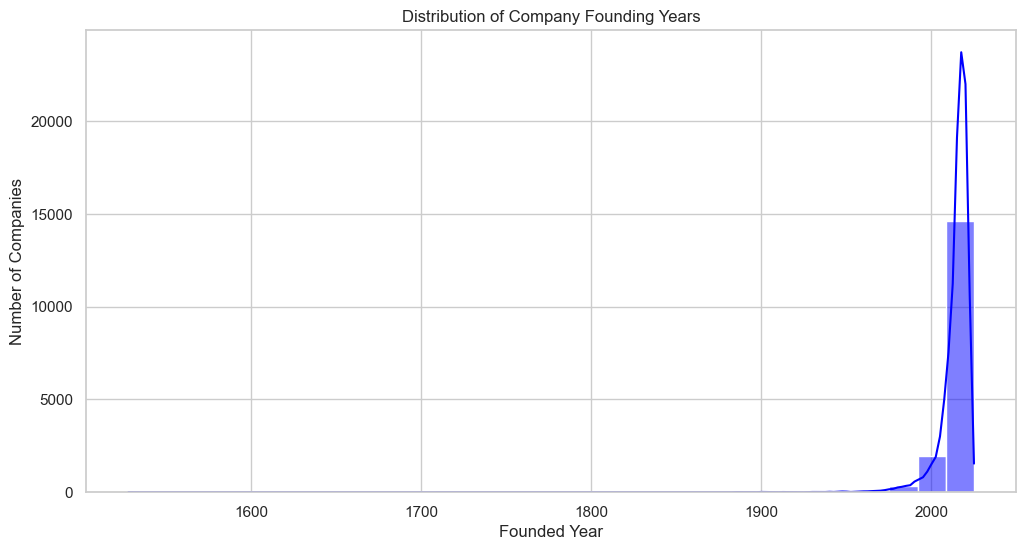

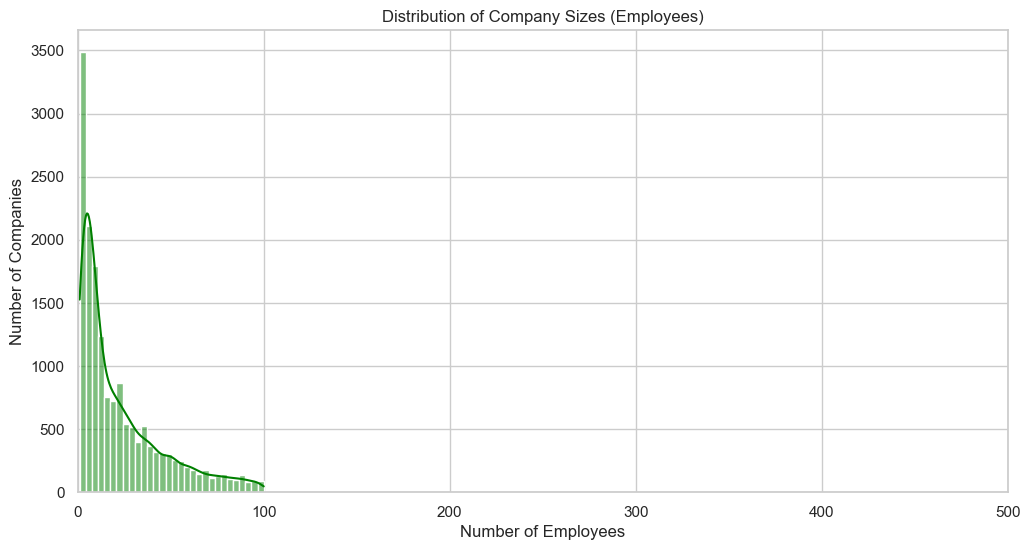

In [23]:
# Company Founding Year Trends
plt.figure(figsize=(12, 6))
sns.histplot(df["Founded Year"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("Founded Year")
plt.ylabel("Number of Companies")
plt.title("Distribution of Company Founding Years")
plt.show()

# Employee Count Distribution (excluding outliers and non-numeric values)
df["# Employees"] = pd.to_numeric(df["# Employees"], errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(df["# Employees"].dropna(), bins=30, kde=True, color="green")
plt.xlabel("Number of Employees")
plt.ylabel("Number of Companies")
plt.title("Distribution of Company Sizes (Employees)")
plt.xlim(0, 500)  # Limiting to 500 employees for better visualization
plt.show()

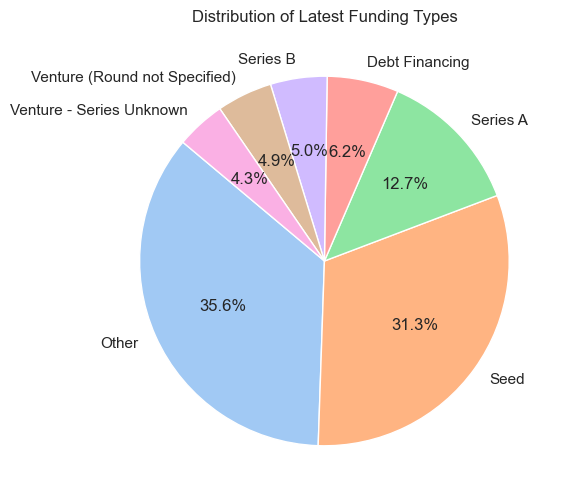

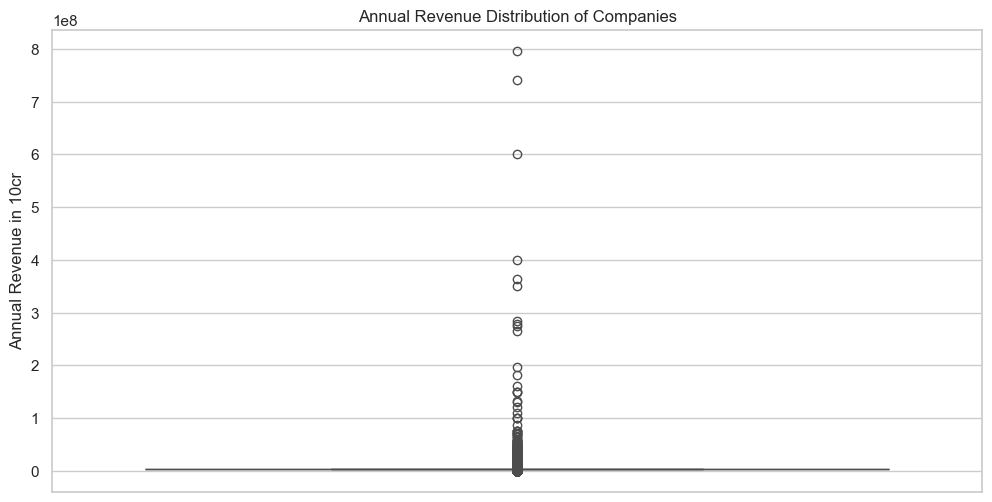

In [24]:

# Funding Type Distribution
plt.figure(figsize=(10, 6))
funding_counts = df["Latest Funding type"].value_counts().head(7)  # Top 7 funding types
plt.pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Distribution of Latest Funding Types")
plt.show()

# Annual Revenue Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(y=df["Annual Revenue"], color="red")
plt.ylabel("Annual Revenue in 10cr")
plt.title("Annual Revenue Distribution of Companies")
plt.show()

# 3_DA - Test Sheet - Company Inputs

In [26]:
df=pd.read_csv("3_DA - Test Sheet - Company Inputs.csv")

In [27]:
df.head()

,Company Name,Person Name,Designation,Person Linkedin
0,BO Street,Kunal Abhishek,Co-Founder,http://www.linkedin.com/in/kunalabhishek
1,Logiclens Solutions,Ajay Satpathy,Founder and CEO,http://www.linkedin.com/in/ajay-satpathy-6a939...
2,Adloop Innovations,Karthik Rajendiran,Chief Technology Officer,http://www.linkedin.com/in/karthik-rajendiran-...
3,Kimipost,Rajesh Singhal,"Co-Founder @ Kimipost ""Empowering eCommerce Sh...",http://www.linkedin.com/in/rajesh-singhal-2bb8...
4,Spacempact,Niyati Shah,Co-Founder,http://www.linkedin.com/in/niyati-shah-89b076203


### Data Visualization

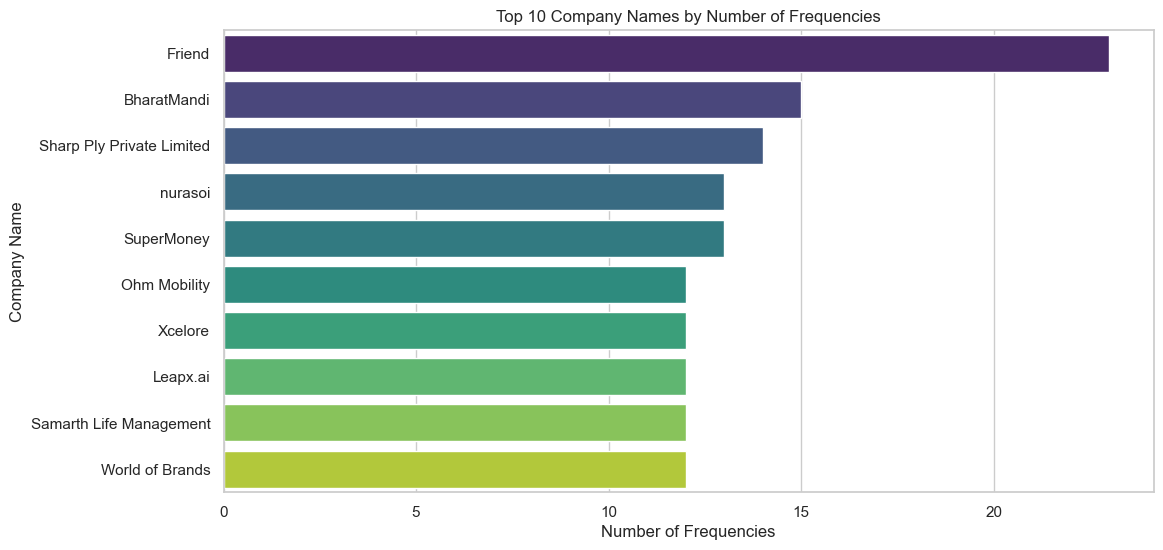

In [29]:
plt.figure(figsize=(12, 6))
industry_counts = df["Company Name"].value_counts().head(10)  # Top 10 company names
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")
plt.xlabel("Number of Frequencies")
plt.ylabel("Company Name")
plt.title("Top 10 Company Names by Number of Frequencies")
plt.show()

# 4_DA Test- Whats app Campaign Process

In [31]:
df=pd.read_csv('4_DA Test- Whats app Campaign Process.csv')

### Data Cleaning

In [33]:
# Drop unnecessary columns (Unnamed columns seem redundant)
df_cleaned = df.drop(columns=["Unnamed: 24", "Unnamed: 25"])

# Check for duplicate rows and remove them if any
df_cleaned = df_cleaned.drop_duplicates()

# Handle missing values: Fill or drop based on context
# 'Priority' might be important, but it has too many missing values, so dropping it
df_cleaned = df_cleaned.drop(columns=["Priority", "Notes"])

# Convert time-related columns to proper datetime format where applicable
time_columns = ["Time", "Time.1", "Time.2", "Time.3", "Time.4"]
for col in time_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")

# Display updated dataset info after cleaning
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6409 entries, 0 to 6491
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             6409 non-null   object        
 1   Company            6409 non-null   object        
 2   Name               6409 non-null   object        
 3   Tittle             6360 non-null   object        
 4   Website            3492 non-null   object        
 5   Company Linkedin   3461 non-null   object        
 6   LinkedinURL        5696 non-null   object        
 7   Duplicate          6409 non-null   object        
 8   NumberDuplicate    6409 non-null   object        
 9   MessageFrom        3793 non-null   object        
 10  WhatsappStatus     3834 non-null   object        
 11  Sundaycampaign     1418 non-null   object        
 12  WhatsappSequence1  3335 non-null   object        
 13  Time               1151 non-null   datetime64[ns]
 14  WhatsappSeque

(None,
      Status         Company             Name         Tittle  \
 0    Active  Accio Robotics     Tuhin Sharma      CoFounder   
 1  Inactive    Alt Mobility       Anuj Gupta  CoFounder&CBO   
 2  Inactive    Alt Mobility        Dev Arora  Cofounder&CEO   
 3  Inactive           Ambak   Pranav Khattar      CoFounder   
 4  Inactive           Ambak  Raghuveer Malik      CoFounder   
 
                           Website  \
 0  https://www.acciorobotics.com/   
 1    https://www.altmobility.com/   
 2    https://www.altmobility.com/   
 3          https://www.ambak.com/   
 4          https://www.ambak.com/   
 
                                  Company Linkedin  \
 0  https://www.linkedin.com/company/acciorobotics   
 1    https://www.linkedin.com/company/altmobility   
 2    https://www.linkedin.com/company/altmobility   
 3  https://www.linkedin.com/company/ambakofficial   
 4  https://www.linkedin.com/company/ambakofficial   
 
                                          LinkedinU

In [34]:
# Fill missing text and categorical values with 'Unknown' or 'Not Available'
text_columns = ["Website", "Company Linkedin", "LinkedinURL", "WhatsappStatus", "MessageFrom"]
df_cleaned[text_columns] = df_cleaned[text_columns].fillna("Unknown")

# Fill missing categorical values with 'Not Available'
categorical_columns = ["Sundaycampaign", "Duplicate", "NumberDuplicate"]
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna("Not Available")

# Time columns: Keeping NaT as it represents missing timestamps accurately
# Display the dataset info after handling missing values
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6409 entries, 0 to 6491
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             6409 non-null   object        
 1   Company            6409 non-null   object        
 2   Name               6409 non-null   object        
 3   Tittle             6360 non-null   object        
 4   Website            6409 non-null   object        
 5   Company Linkedin   6409 non-null   object        
 6   LinkedinURL        6409 non-null   object        
 7   Duplicate          6409 non-null   object        
 8   NumberDuplicate    6409 non-null   object        
 9   MessageFrom        6409 non-null   object        
 10  WhatsappStatus     6409 non-null   object        
 11  Sundaycampaign     6409 non-null   object        
 12  WhatsappSequence1  3335 non-null   object        
 13  Time               1151 non-null   datetime64[ns]
 14  WhatsappSeque

(None,
      Status         Company             Name         Tittle  \
 0    Active  Accio Robotics     Tuhin Sharma      CoFounder   
 1  Inactive    Alt Mobility       Anuj Gupta  CoFounder&CBO   
 2  Inactive    Alt Mobility        Dev Arora  Cofounder&CEO   
 3  Inactive           Ambak   Pranav Khattar      CoFounder   
 4  Inactive           Ambak  Raghuveer Malik      CoFounder   
 
                           Website  \
 0  https://www.acciorobotics.com/   
 1    https://www.altmobility.com/   
 2    https://www.altmobility.com/   
 3          https://www.ambak.com/   
 4          https://www.ambak.com/   
 
                                  Company Linkedin  \
 0  https://www.linkedin.com/company/acciorobotics   
 1    https://www.linkedin.com/company/altmobility   
 2    https://www.linkedin.com/company/altmobility   
 3  https://www.linkedin.com/company/ambakofficial   
 4  https://www.linkedin.com/company/ambakofficial   
 
                                          LinkedinU

### Data Visualization

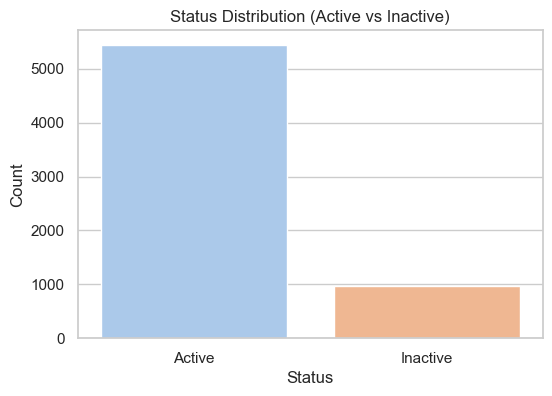

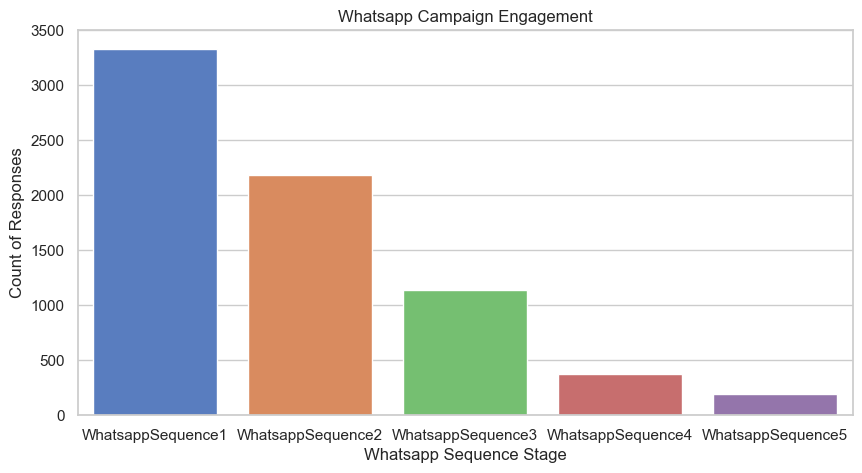

In [36]:
# Plot 1: Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x="Status", palette="pastel")
plt.title("Status Distribution (Active vs Inactive)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Plot 2: Whatsapp Campaign Engagement (count of sequences)
whatsapp_cols = ["WhatsappSequence1", "WhatsappSequence2", "WhatsappSequence3", "WhatsappSequence4", "WhatsappSequence5"]
campaign_counts = df_cleaned[whatsapp_cols].notna().sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette="muted")
plt.title("Whatsapp Campaign Engagement")
plt.xlabel("Whatsapp Sequence Stage")
plt.ylabel("Count of Responses")
plt.show()

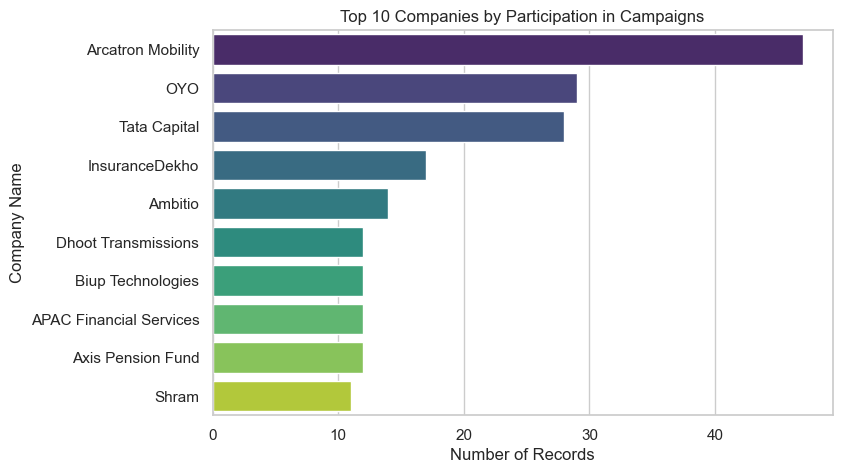

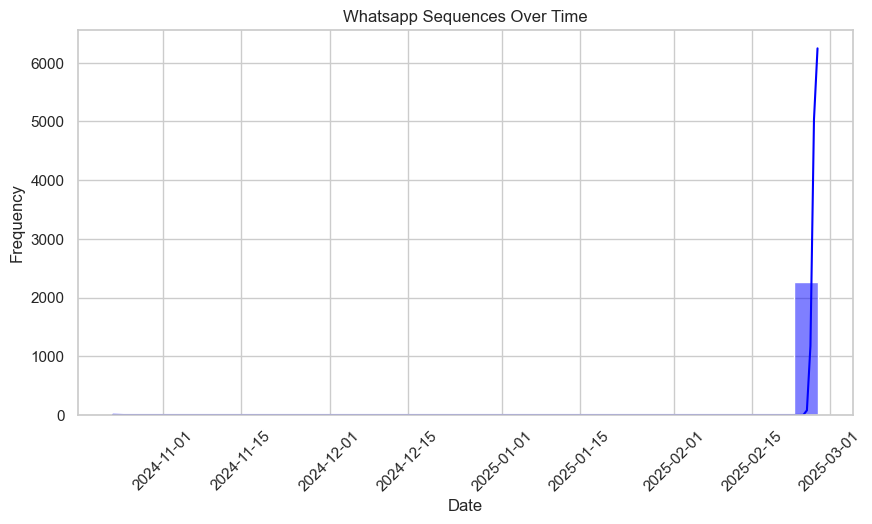

In [37]:
# Plot 3: Top 10 Companies by Participation
top_companies = df_cleaned["Company"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_companies.index, x=top_companies.values, palette="viridis")
plt.title("Top 10 Companies by Participation in Campaigns")
plt.xlabel("Number of Records")
plt.ylabel("Company Name")
plt.show()

# Plot 4: Time-Based Trends for Whatsapp Sequences
df_time = df_cleaned[["Time", "Time.1", "Time.2"]].stack().reset_index(drop=True)
df_time = df_time.dropna().sort_values()

plt.figure(figsize=(10, 5))
sns.histplot(df_time, bins=30, kde=True, color="blue")
plt.title("Whatsapp Sequences Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# 5_DA Test- Linkedin Campaign Process - LinkedinMasterDataBase

In [39]:
df=pd.read_csv('5_DA Test- Linkedin Campaign Process - LinkedinMasterDataBase.csv')

### Data Cleaning and Handling

In [41]:
# Convert all column names to lowercase and replace spaces with underscores for consistency
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handling missing values:
# - Drop rows where 'company_name' or 'name' is missing (key identifiers)
df.dropna(subset=['company_name', 'name'], inplace=True)

# Convert date columns to datetime format (handling errors gracefully)
date_columns = [col for col in df.columns if "date" in col]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Assuming day-first format

# Standardize categorical values in 'account_status' and 'linkedin_status'
df['account_status'] = df['account_status'].str.strip().str.capitalize()
df['linkedin_status'] = df['linkedin_status'].str.strip().str.lower()

# Remove duplicate entries based on 'name' and 'company_name'
df.drop_duplicates(subset=['name', 'company_name'], keep='first', inplace=True)

# Display cleaned dataset summary
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6584 entries, 0 to 6722
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   account_status     6584 non-null   object        
 1   company_name       6584 non-null   object        
 2   name               6584 non-null   object        
 3   personal_linkedin  6557 non-null   object        
 4   website            5453 non-null   object        
 5   company_linkedin   4134 non-null   object        
 6   designation        6547 non-null   object        
 7   linkedin_status    4968 non-null   object        
 8   linkedin_account_  4920 non-null   object        
 9   date               4542 non-null   datetime64[ns]
 10  linkedin_invite    4773 non-null   object        
 11  date.1             1290 non-null   datetime64[ns]
 12  sequence_1         2285 non-null   object        
 13  date.2             741 non-null    datetime64[ns]
 14  sequence_2   

(None,
   account_status company_name               name  \
 0       Inactive       13SQFT        Alok Bansal   
 1         Active           1K    Abhishek Halder   
 2         Active           1K      Sachin Sharma   
 3         Active  2070 Health    Pankaj Jethwani   
 4       Inactive   5C Network  Kalyan Sivasailam   
 
                                    personal_linkedin  \
 0    http://www.linkedin.com/in/alok-bansal-87162637   
 1          http://www.linkedin.com/in/halderabhishek   
 2  http://www.linkedin.com/in/sachin-sharma-7b11a515   
 3              https://www.linkedin.com/in/pankajsj/   
 4      https://www.linkedin.com/in/kalyansivasailam/   
 
                      website company_linkedin              designation  \
 0     http://www.13sqft.com/              NaN                  Founder   
 1    http://www.niyotail.com              NaN                  Founder   
 2    http://www.niyotail.com              NaN                  Founder   
 3                        NaN

### Data Visualization

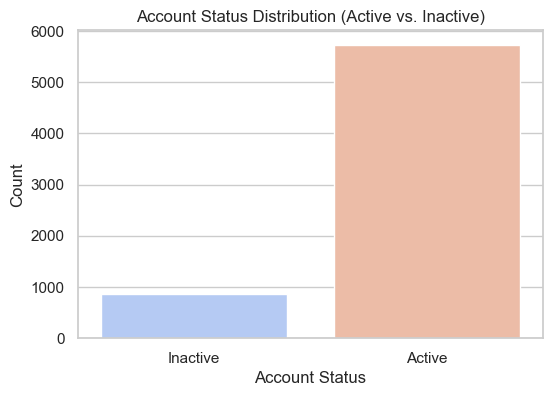

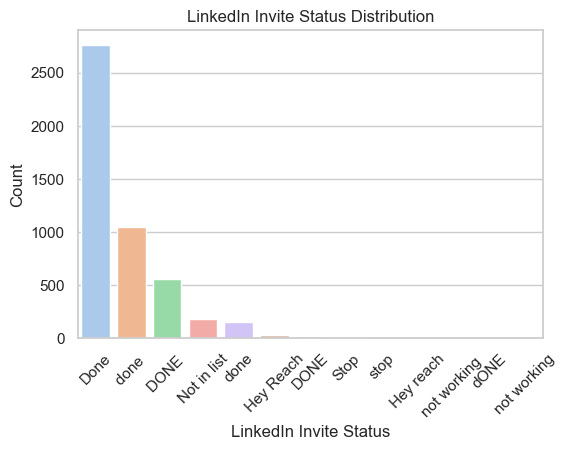

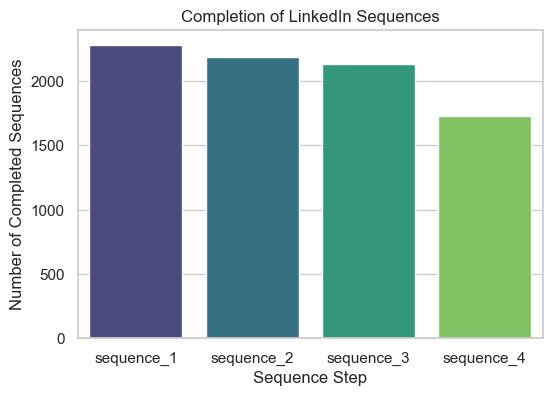

In [43]:
# Set style for better visuals
sns.set_theme(style="whitegrid")

# Plot: Active vs. Inactive Accounts
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="account_status", palette="coolwarm")
plt.title("Account Status Distribution (Active vs. Inactive)")
plt.xlabel("Account Status")
plt.ylabel("Count")
plt.show()

# Plot: LinkedIn Invite Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="linkedin_invite", palette="pastel", order=df["linkedin_invite"].value_counts().index)
plt.title("LinkedIn Invite Status Distribution")
plt.xlabel("LinkedIn Invite Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Plot: Completion of Sequences
sequence_columns = ["sequence_1", "sequence_2", "sequence_3", "sequence_4"]
sequence_counts = df[sequence_columns].notna().sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=sequence_counts.index, y=sequence_counts.values, palette="viridis")
plt.title("Completion of LinkedIn Sequences")
plt.xlabel("Sequence Step")
plt.ylabel("Number of Completed Sequences")
plt.show()

# 6_DA - Test - Email Campaign Process - All Email Data

In [45]:
df=pd.read_csv('6_DA - Test - Email Campaign Process - All Email Data.csv')

In [46]:
# Standardizing column names
df.rename(columns={'Tittle': 'Title'}, inplace=True)

In [47]:
# Stripping extra spaces from column names
df.columns = df.columns.str.strip()

# Now, retrying the cleaning process
df['Company Linkedin'].fillna("Unknown", inplace=True)
df['Linkedin URL'].fillna("Unknown", inplace=True)
df['Campaign Name'].fillna("No Campaign", inplace=True)
df['Email Status'].fillna("No Status", inplace=True)

# Verifying cleaning steps
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company Name      9893 non-null   object
 1   Name              9893 non-null   object
 2   Title             9893 non-null   object
 3   Website           3686 non-null   object
 4   Company Linkedin  9893 non-null   object
 5   Linkedin URL      9893 non-null   object
 6   Campaign Name     9893 non-null   object
 7   Email Status      9893 non-null   object
dtypes: object(8)
memory usage: 618.4+ KB


(None,
   Company Name                  Name               Title  \
 0        50Fin          Darpan Tanna          Co-Founder   
 1        8club            Madhur Rao  Co-Founder and CTO   
 2        8club       Kaushal Chanani          Co-Founder   
 3        8club           Kunal Yadav    Co-Founder & CEO   
 4       AADYAH  Sunderarajan Varadan                 CEO   
 
                    Website                                   Company Linkedin  \
 0    https://www.50fin.in/             https://www.linkedin.com/company/50fin   
 1    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 2    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 3    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 4  https://www.aadyah.com/  https://www.linkedin.com/company/aadyah-aerosp...   
 
                                         Linkedin URL Campaign Name  \
 0            https://www.linkedin.com/in/darpantanna   No C

### Data Cleaning Summary

In [49]:
# Data Handling: Extracting insights and formatting

# Extracting domain from Website URLs for company analysis
# Ensuring all values are treated as strings before splitting
df['Website Domain'] = df['Website'].astype(str).apply(lambda x: x.split("//")[-1].split("/")[0] if x != "Unknown" else "Unknown")

# Checking the top website domains
df['Website Domain'].value_counts().head(10)


# Standardizing Email Status values (removing inconsistencies)
df['Email Status'] = df['Email Status'].str.strip().str.lower()

# Checking unique values in Email Status
df['Email Status'].value_counts()


Email Status
no status                           6118
not in list                         3324
campaign started from smart lead     451
Name: count, dtype: int64

### Data Handling

In [51]:
# Analyzing campaign engagement by counting occurrences of each Campaign Name
campaign_analysis = df['Campaign Name'].value_counts().reset_index()
campaign_analysis.columns = ['Campaign Name', 'Count']

# Checking top 10 campaigns
campaign_analysis.head(10)

,Campaign Name,Count
0,Employee Size 11 - 100 (Founded Year 2020 - 20...,6045
1,No Campaign,3848


### Data Visualization

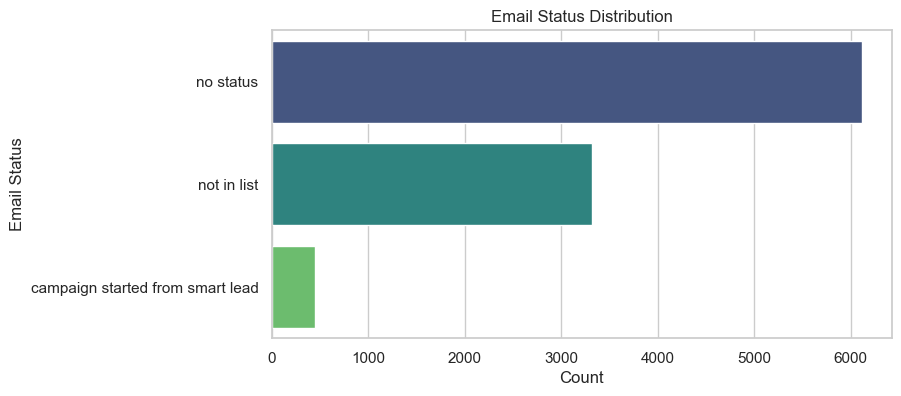

In [53]:
# Setting style
sns.set_theme(style="whitegrid")

# Plot: Distribution of Email Status
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="Email Status", order=df["Email Status"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Email Status")
plt.title("Email Status Distribution")
plt.show()

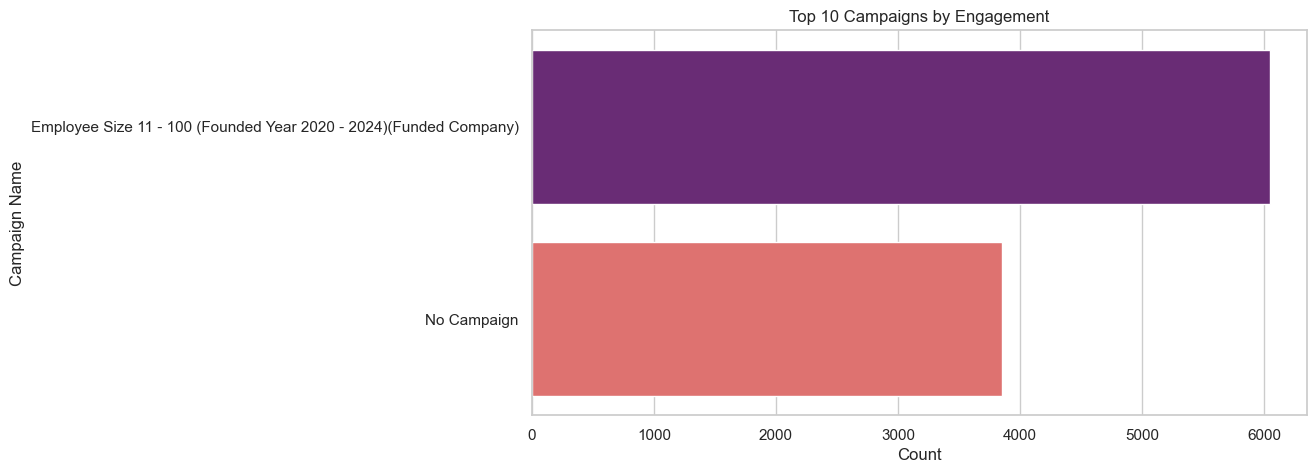

In [54]:
# Plot: Top 10 Campaigns by Count
top_campaigns = campaign_analysis.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_campaigns, y="Campaign Name", x="Count", palette="magma")
plt.xlabel("Count")
plt.ylabel("Campaign Name")
plt.title("Top 10 Campaigns by Engagement")
plt.show()

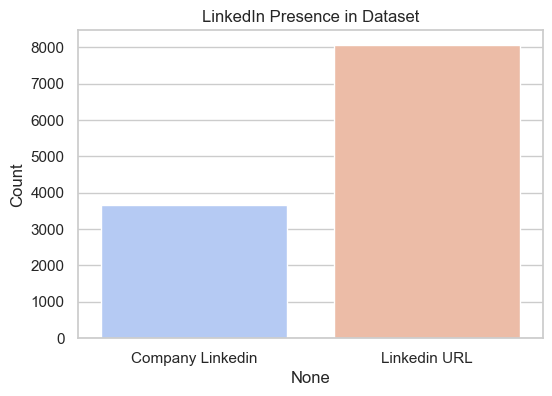

In [55]:
# Counting how many entries have valid LinkedIn URLs
linkedin_presence = df[['Company Linkedin', 'Linkedin URL']].applymap(lambda x: x != "Unknown").sum()

# Plot: LinkedIn Presence Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x=linkedin_presence.index, y=linkedin_presence.values, palette="coolwarm")
plt.ylabel("Count")
plt.title("LinkedIn Presence in Dataset")
plt.show()